In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=["date"])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [426]:
t_per = df["value"].quantile(0.025)
b_per = df["value"].quantile(0.975)
df = df.loc[(df["value"] > t_per) & (df["value"] < b_per)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


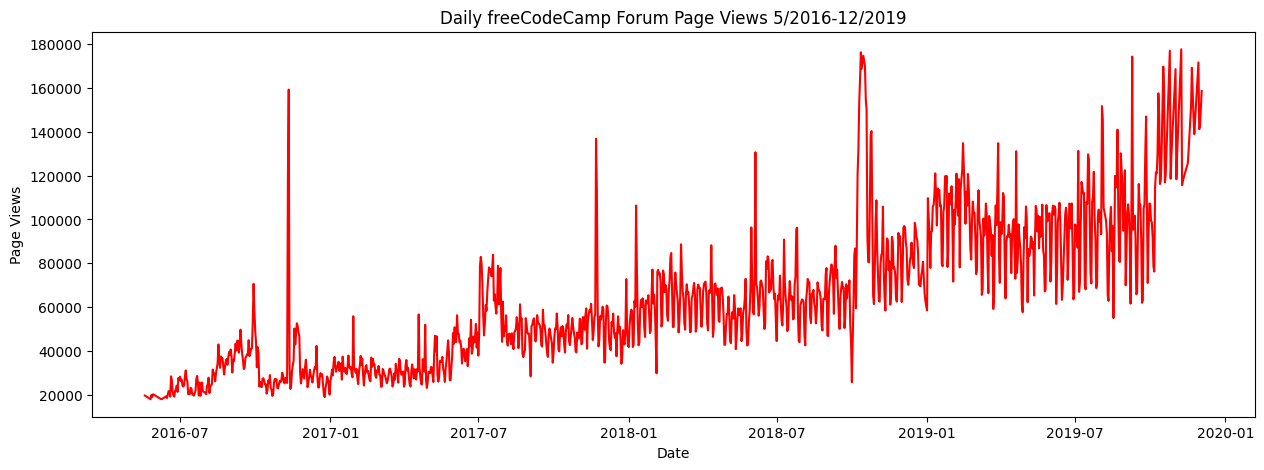

In [427]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.plot(df.index, df.values, color="red")
# Reduce number of thicks
# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

In [428]:
df_copy = df.copy()
df_copy.loc[:, "month"] = df.index.month
df_copy.loc[:, "year"] = df.index.year

In [429]:
months = {
        1: "January", 
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }


def set_month(month_no):
    for i in range(1, 13):
        if month_no == i:
            month_no = months[i]
            return month_no


months_2 = [months[i][:3] for i in range(1, 13)]

In [430]:
bar_plot = df_copy.groupby(["month", "year"], as_index=False).mean()
bar_plot["month"] = bar_plot["month"].apply(set_month)

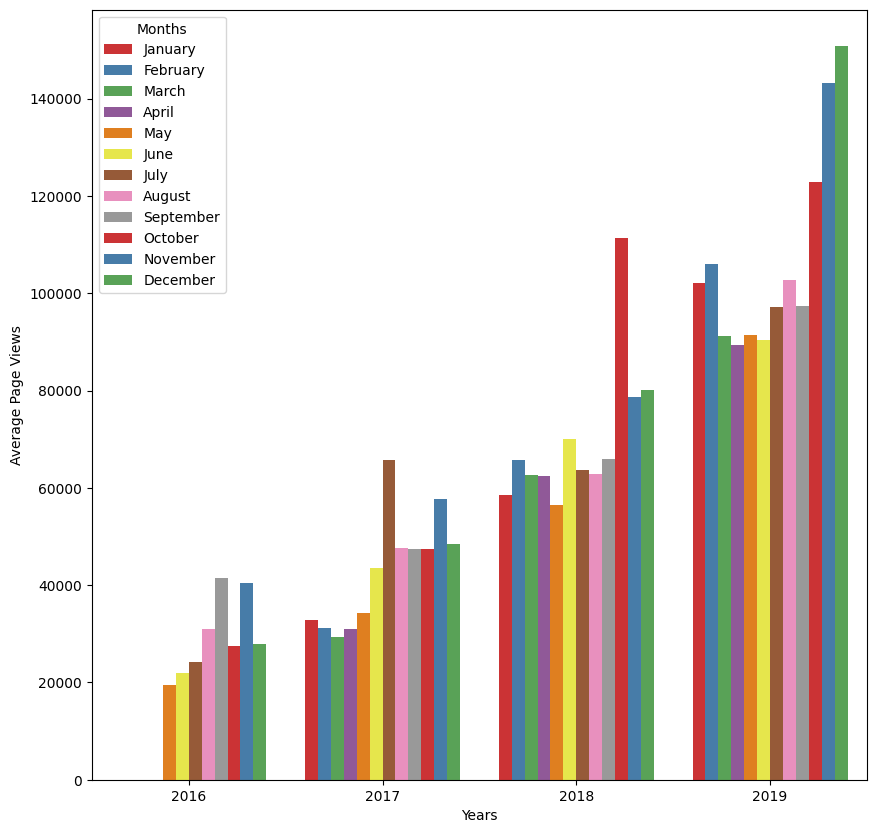

In [431]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=bar_plot, x="year", y="value", hue="month", palette="Set1")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
plt.legend(title="Months", loc="upper left")
plt.show()

In [432]:
box_plot = df_copy
box_plot = df_copy.groupby(["month", "year"], as_index=False)

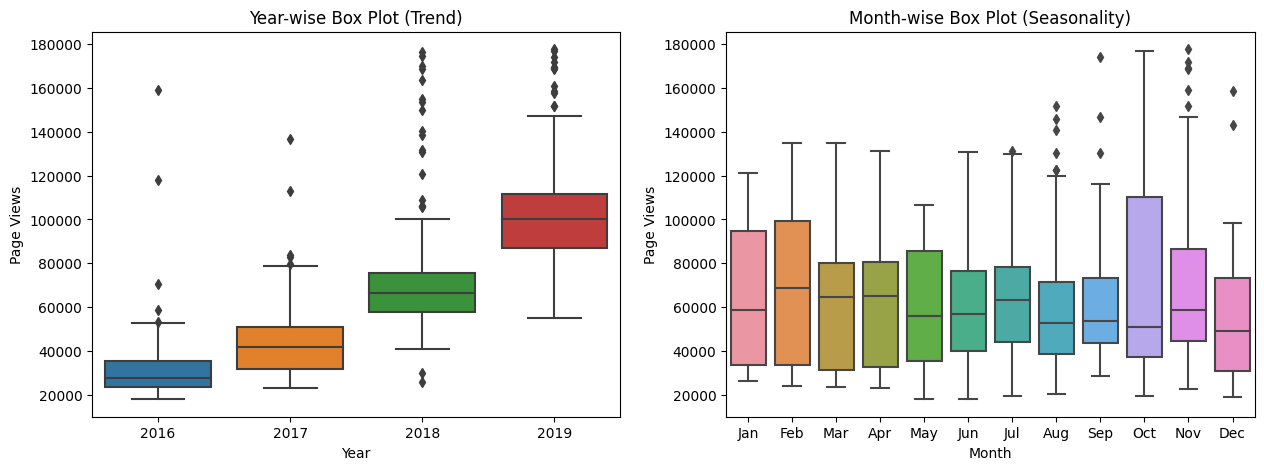

In [435]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_copy, x="year", y="value", ax=ax[0])
ax[0].set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views")
sns.boxplot(data=df_copy, x="month", y="value", ax=ax[1])
ax[1].set(title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views")
ax[1].set_xticklabels(months_2)
plt.show()